# Fin Vol Functions - SSVI Model

We examine the Gatheral SVI and SSVI Functions following
https://wwwf.imperial.ac.uk/~ajacquie/IC_AMDP/IC_AMDP_Docs/Code/SSVI.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.models.volatility_fns import *

## SSI Model Volatility Smile

Set the forward price

In [3]:
f = 100.0

I shift the volatility curve by 0.8%  to the left

In [4]:
strikes = np.linspace(36.0, 300.0, 100)

In [5]:
log_moneyness = np.log(f/strikes)

In [6]:
a, b, rho, m, sigma = 0.030358, 0.0503815, -0.1, 0.3, 0.048922

In [7]:
t = 1.0

In [8]:
params_1 = np.array([a, b, rho, m, sigma])

In [9]:
volSSI_1 = []
for k in strikes:
    volSSI_1.append(vol_function_svi(params_1, f, k, t))

In [10]:
params_2 = np.array([a, b, rho, m, 3.0*sigma])

In [11]:
volSSI_2 = []
for k in strikes:
    volSSI_2.append(vol_function_svi(params_2, f, k, t))

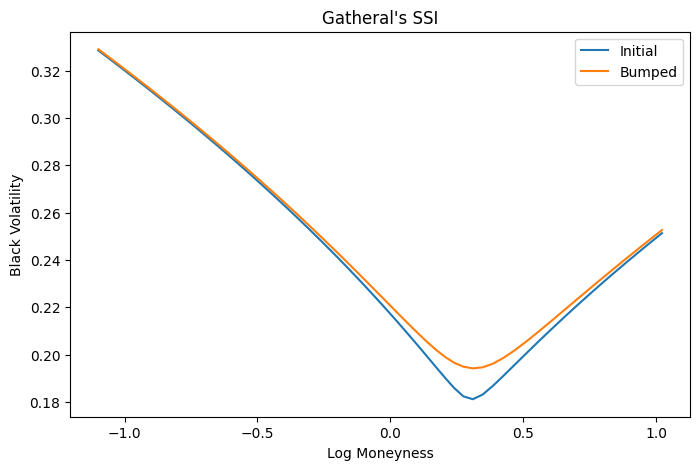

In [12]:
plt.figure(figsize=(8,5))
plt.plot(log_moneyness, volSSI_1, label="Initial")
plt.plot(log_moneyness, volSSI_2, label="Bumped")
plt.title("Gatheral's SSI")
plt.xlabel("Log Moneyness")
plt.ylabel("Black Volatility")
plt.legend()

## Surface SVI

We now build the surface SSVI due to Gatheral and Jacquier

In [13]:
f = 100.0

In [14]:
sigma, gamma, rho = 0.2, 0.8, -0.7

In [15]:
print("Consistency check to avoid static arbitrage: ", (gamma - 0.25 * (1. + np.abs(rho)) > 0))

Consistency check to avoid static arbitrage:  True


In [16]:
params = np.array([gamma, sigma, rho])

In [17]:
XX, TT = np.linspace(-1., 1., 50), np.linspace(0.001, 5., 50)

In [18]:
localVarianceSSVI = np.array([[ssvi_local_varg(x, gamma, sigma, rho, t) for x in XX] for t in TT])

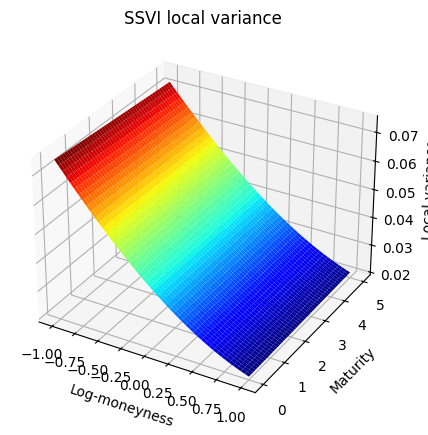

In [19]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(projection="3d")
XXX, TTT = np.meshgrid(XX, TT)
ax.plot_surface(XXX, TTT, localVarianceSSVI,
cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel("Log-moneyness")
ax.set_ylabel("Maturity")
ax.set_zlabel("Local variance")
ax.set_title("SSVI local variance")
plt.show()

In [20]:
params = np.array([gamma, sigma, rho])

In [21]:
blackVolSSVI = np.array([[100.0 * vol_function_ssvi(params, f, k, t) for k in strikes] for t in TT]);

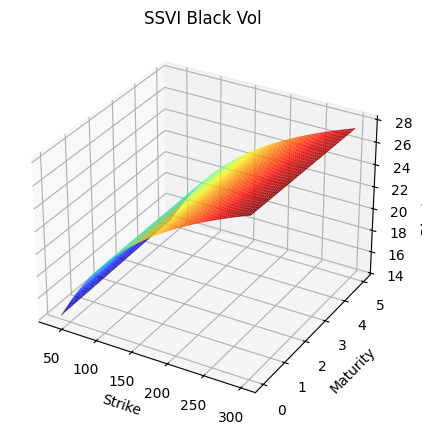

In [22]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(projection="3d")
xxx, TTT = np.meshgrid(strikes, TT)
ax.plot_surface(xxx, TTT, blackVolSSVI,
cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel("Strike")
ax.set_ylabel("Maturity")
ax.set_zlabel("Black Vol (%)")
ax.set_title("SSVI Black Vol")
plt.show()

Copyright (c) 2020 Dominic O'Kane